# Mirex Data Preprocessing

In this notebook, we prepare the Mirex dataset as input for modeling by performing the following preprocessing steps:
- Feature selection: We remove highly correlated features and those that are constant or nearly constant to reduce redundancy and noise.
- Quantile normalization: All remaining features are quantile normalized to ensure a consistent scale across variables.

## Packages

In [1]:
# general
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import dill

# normalization
from scipy.stats import shapiro
from sklearn.preprocessing import QuantileTransformer

# plots
import seaborn as sns
import matplotlib.pyplot as plt

## Feature selection, normalization

### SF

In [2]:
df_sf = pd.read_csv('data/audio/preprocessed_SF.csv', index_col=0, dtype=str)
feature_names_sf = df_sf.columns[4:141]
features_sf = np.array(df_sf[feature_names_sf]).astype('float')

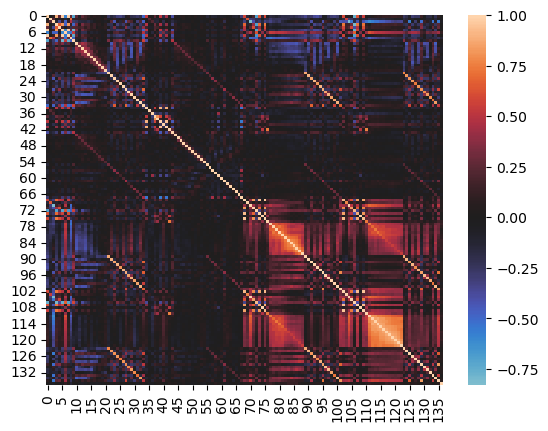

In [3]:
sns.heatmap(np.corrcoef(features_sf.T), center=0)
plt.show()

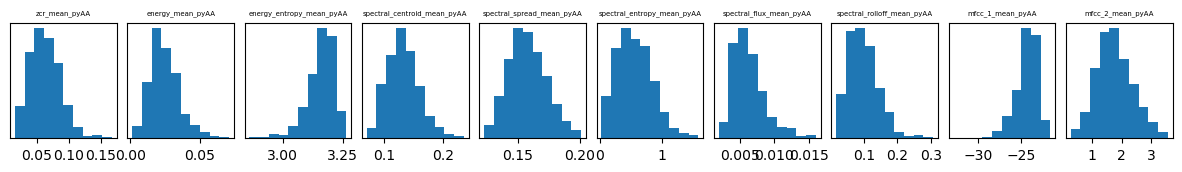

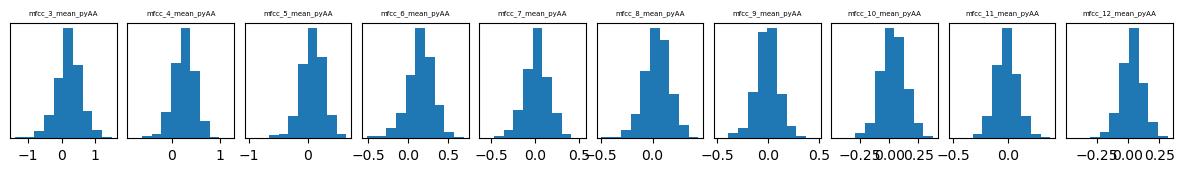

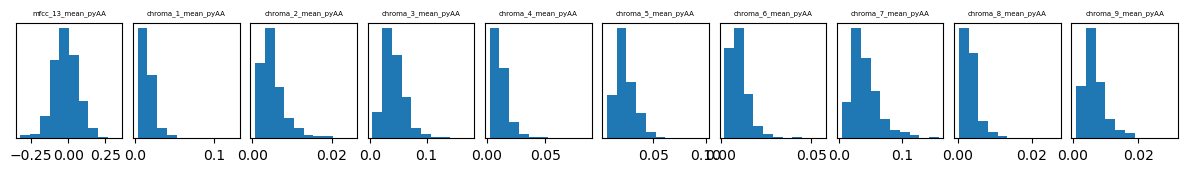

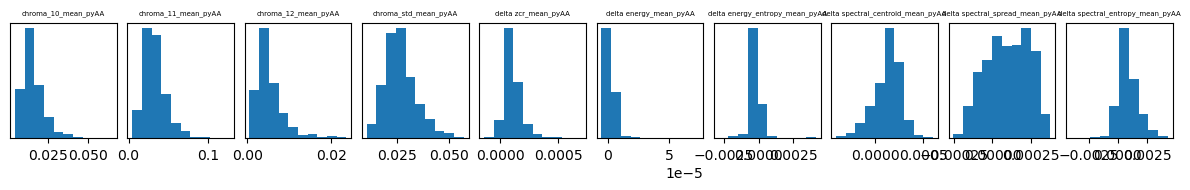

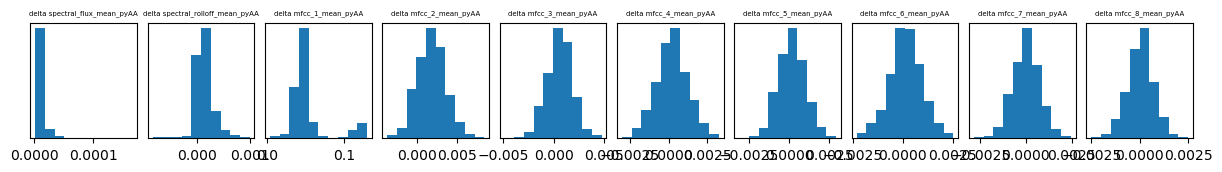

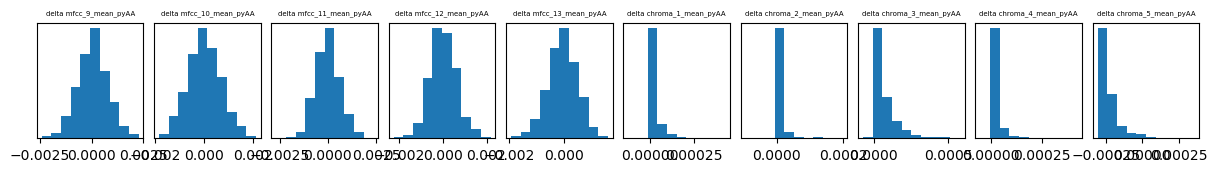

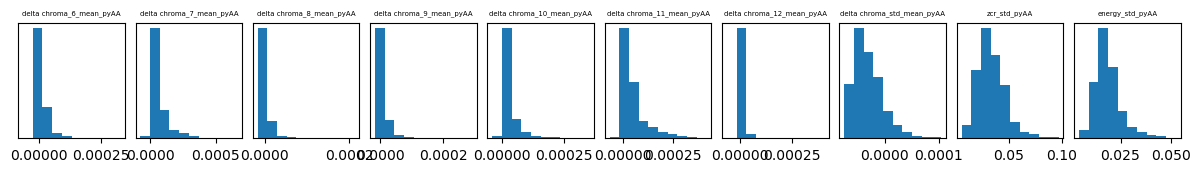

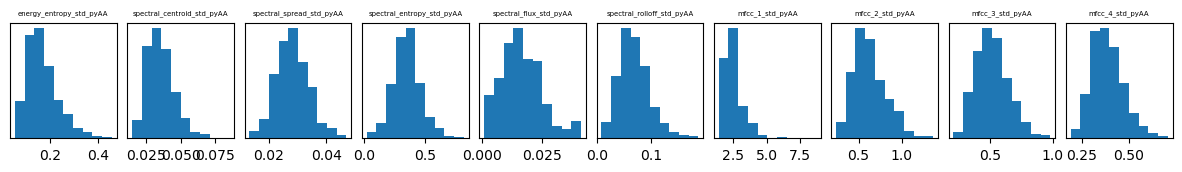

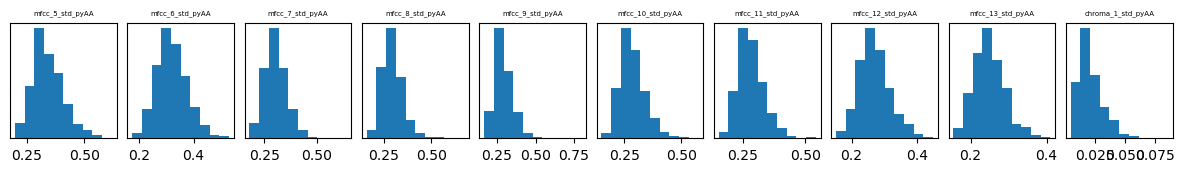

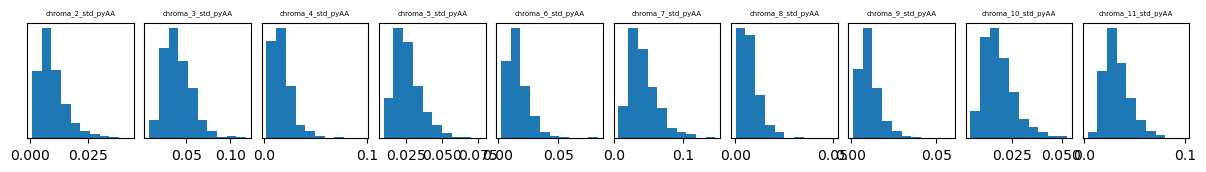

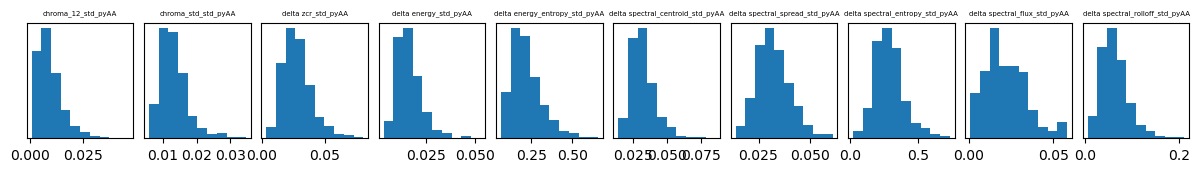

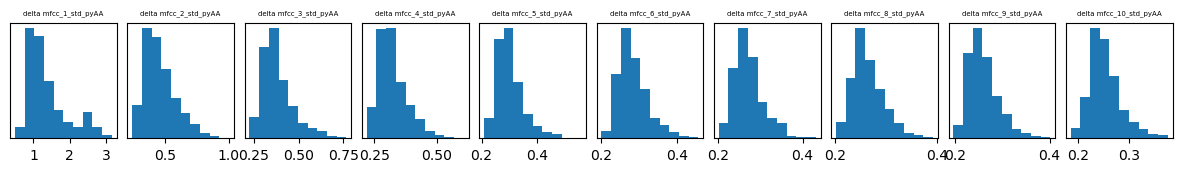

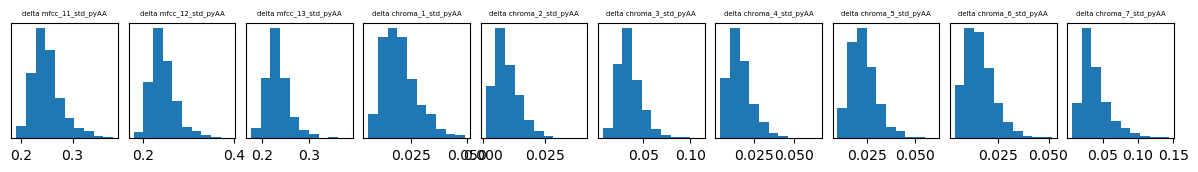

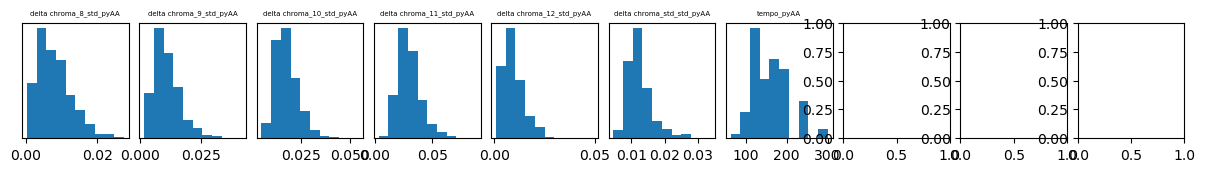

In [4]:
for j in range(0,14):
    fig, axes = plt.subplots(1, 10, figsize=(15, 1.5))
    for i in range(10):
        if i+10*j < features_sf.shape[1]:
            axes[i].hist(features_sf[:,i+10*j])
            axes[i].set_yticks([])
            axes[i].set_title(feature_names_sf[i+10*j], fontsize=5)
    plt.subplots_adjust(wspace=0.1, hspace=0)
    plt.show()

In [5]:
qt = QuantileTransformer(n_quantiles = 500, output_distribution='normal')
features_sf = qt.fit_transform(features_sf)

### MF

In [6]:
df_mf = pd.read_csv('data/audio/preprocessed_MF.csv', index_col=0, dtype=str)
feature_names_mf = df_mf.columns[:110]
features_mf = np.array(df_mf[feature_names_mf]).astype('float')

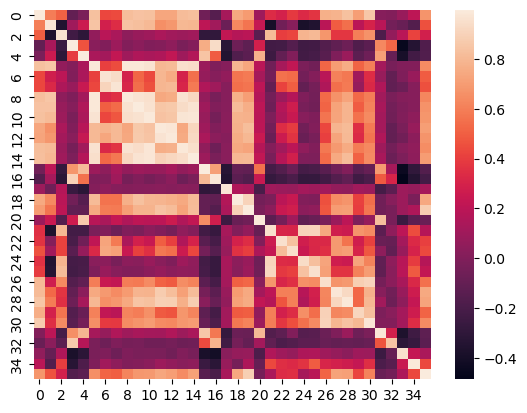

In [7]:
sns.heatmap(np.corrcoef(features_mf[:,:36].T, features_mf[:,38:74].T)[:36,36:])
plt.show()

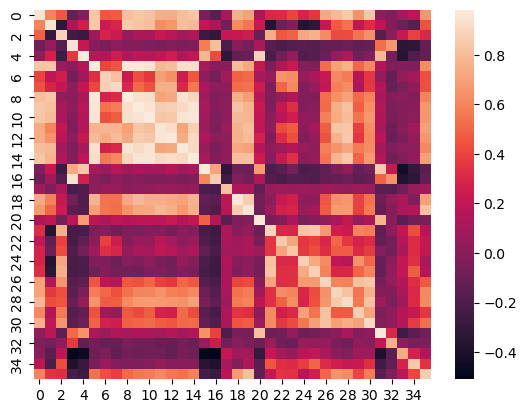

In [8]:
sns.heatmap(np.corrcoef(features_mf[:,74:].T, features_mf[:,38:74].T)[:36,36:])
plt.show()

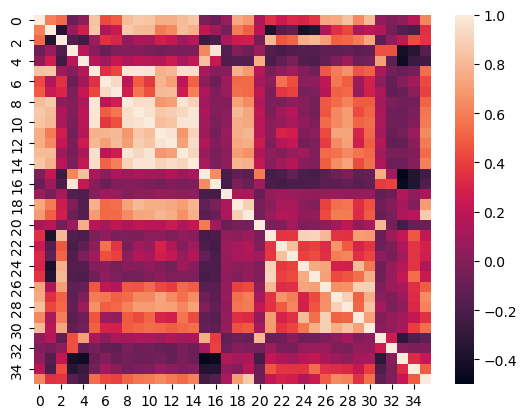

In [9]:
sns.heatmap(np.corrcoef(features_mf[:,74:].T))
plt.show()

In [10]:
features_mf_selected = [
    # based on all obs
    'global_highest_pitch_cents_all', 'global_lowest_pitch_cents_all', 'global_pitch_range_cents_all', 'duration_mean_all',
 'interval_duration_mean_all', 'interval_duration_std_all',
 # based on longest 1/3 of observations
 'global_highest_pitch_cents_onethird',
       'global_lowest_pitch_cents_onethird',
       'global_pitch_range_cents_onethird', 'global_vibrato_coverage_onethird',
       'duration_mean_onethird', 'pitch_mean_height_cents_mean_onethird',
       'pitch_deviation_cents_mean_onethird',
       'pitch_range_cents_mean_onethird', 'pitch_min_cents_mean_onethird',
       'pitch_max_cents_mean_onethird', 'pitch_mean_height_hz_mean_onethird',
       'pitch_deviation_hz_mean_onethird', 'pitch_range_hz_mean_onethird',
       'pitch_min_hz_mean_onethird', 'pitch_max_hz_mean_onethird',
       'vibrato_length_mean_onethird', 'vibrato_coverage_mean_onethird',
       'vibrato_rate_hz_mean_onethird', 'vibrato_extend_cents_mean_onethird',
       'vibrato_extend_hz_mean_onethird', 'duration_std_onethird',
       'pitch_mean_height_cents_std_onethird',
       'pitch_deviation_cents_std_onethird', 'pitch_range_cents_std_onethird',
       'pitch_min_cents_std_onethird', 'pitch_max_cents_std_onethird',
       'pitch_mean_height_hz_std_onethird', 'pitch_deviation_hz_std_onethird',
       'pitch_range_hz_std_onethird', 'pitch_min_hz_std_onethird',
       'pitch_max_hz_std_onethird', 'vibrato_length_std_onethird',
       'vibrato_coverage_std_onethird', 'vibrato_rate_hz_std_onethird',
       'vibrato_extend_cents_std_onethird', 'vibrato_extend_hz_std_onethird']

In [11]:
features_mf = np.array(df_mf[features_mf_selected]).astype('float')
feature_names_mf = df_mf[features_mf_selected].columns

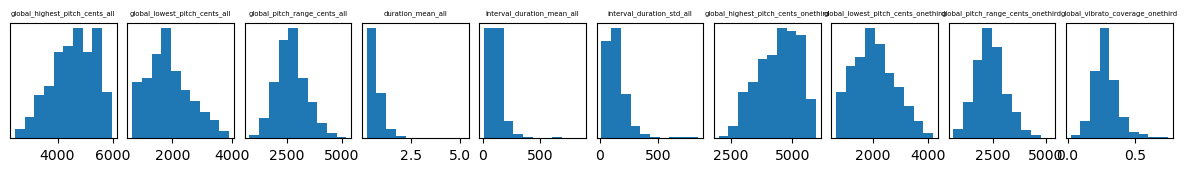

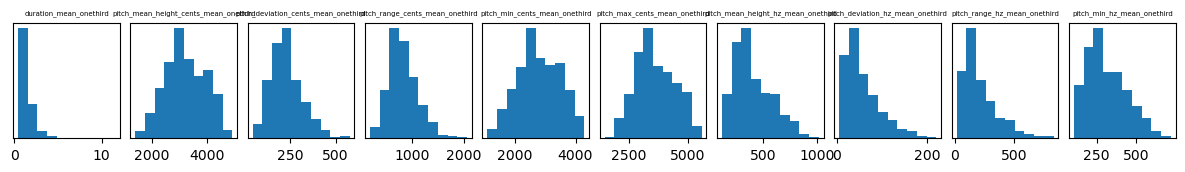

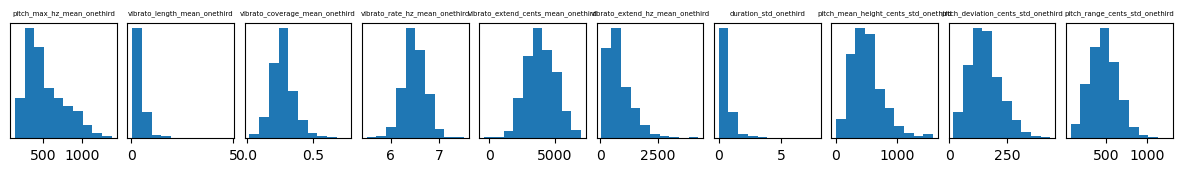

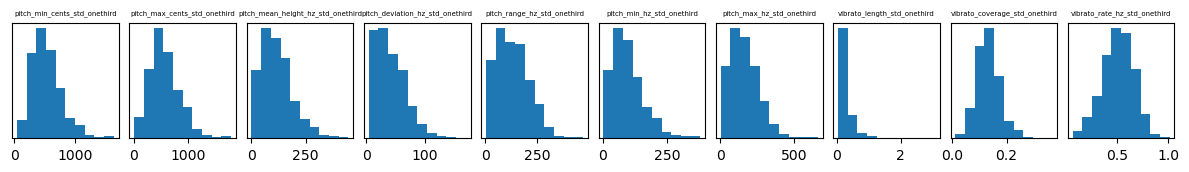

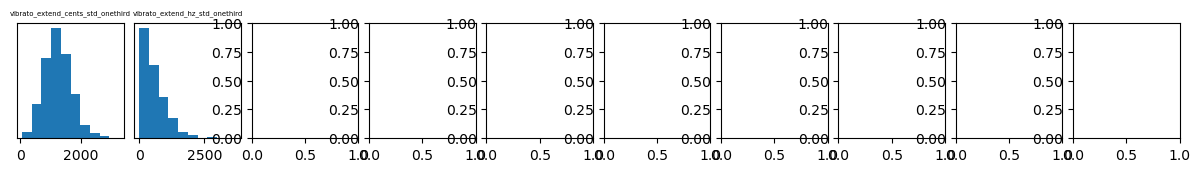

In [12]:
for j in range(0,5):
    fig, axes = plt.subplots(1, 10, figsize=(15, 1.5))
    for i in range(10):
        if i+10*j < features_mf.shape[1]:
            axes[i].hist(features_mf[:,i+10*j])
            axes[i].set_yticks([])
            axes[i].set_title(feature_names_mf[i+10*j], fontsize=5)
    plt.subplots_adjust(wspace=0.1, hspace=0)
    plt.show()

In [13]:
qt = QuantileTransformer(n_quantiles = 500, output_distribution='normal')
features_mf = qt.fit_transform(features_mf)

### LF

In [14]:
df_lf = pd.read_csv('data/text_modality/preprocessed_lyrics_simpleview.csv', index_col=0, dtype=str)
feature_names_lf = ['lines', 'words', 'verses', 'words_token', 'unique_words_token',
       'length_mean_words_token', 'length_max_words_token',
       'length_mstd_words_token', 'polarity', 'subjectivity', 'DET', 'PRON',
       'CCONJ', 'ADP', 'PUNCT']
features_lf = np.array(df_lf[feature_names_lf]).astype('float')
feature_names_lf = df_lf[feature_names_lf].columns

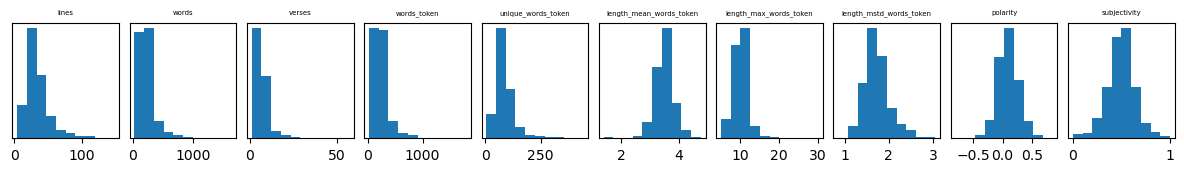

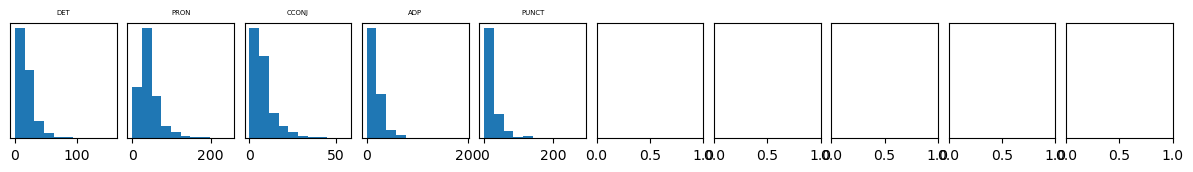

In [15]:
for j in range(0,2):
    fig, axes = plt.subplots(1, 10, figsize=(15, 1.5))
    for i in range(10):
        if i+10*j < features_lf.shape[1]:
            axes[i].hist(features_lf[:,i+10*j])
            axes[i].set_title(feature_names_lf[i+10*j], fontsize=5)
        axes[i].set_yticks([])
            
    plt.subplots_adjust(wspace=0.1, hspace=0)
    plt.show()

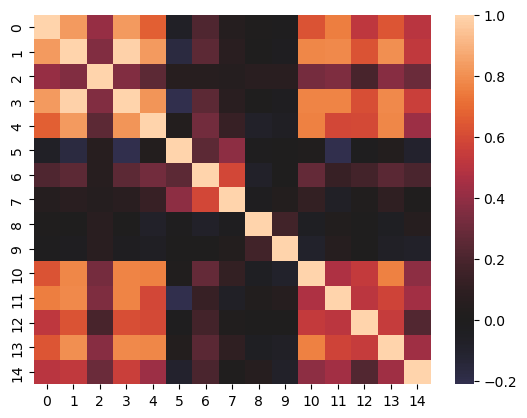

In [16]:
sns.heatmap(np.corrcoef(features_lf.T), center=0)
plt.show()

In [17]:
qt = QuantileTransformer(n_quantiles = 500, output_distribution='normal')
features_lf = qt.fit_transform(features_lf)

### EF

In [18]:
df_ef = pd.read_csv('data/audio/preprocessed_EF.csv', index_col=0, dtype=str)
feature_names_ef = df_ef.columns[:103]
features_ef = np.array(df_ef[feature_names_ef]).astype('float')

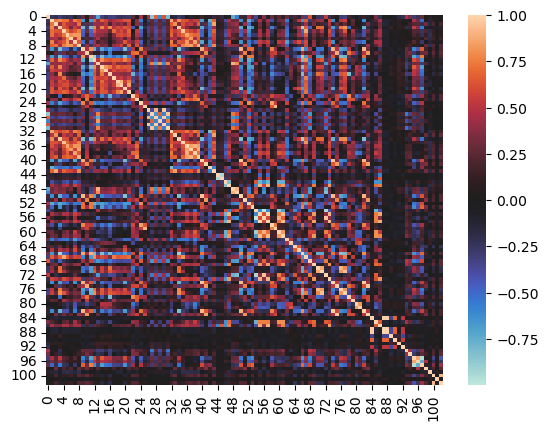

In [19]:
sns.heatmap(np.corrcoef(features_ef.T), center=0)
plt.show()

In [20]:
np.where(np.std((features_ef), axis=0) <= 0.001)[0]

array([54, 55, 58, 72, 73])

In [21]:
# get rid off almost constant features
feature_names_ef = feature_names_ef.delete([54, 55, 58, 72, 73])
features_ef = np.array(df_ef[feature_names_ef]).astype('float')

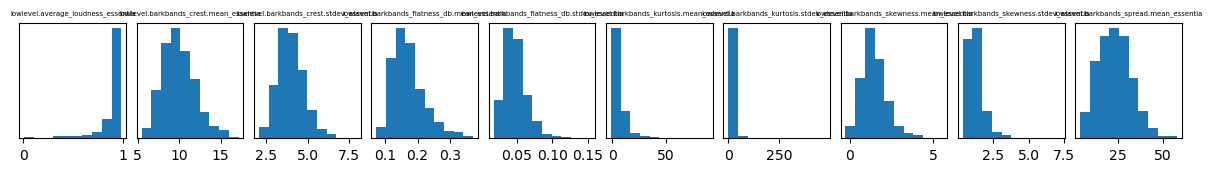

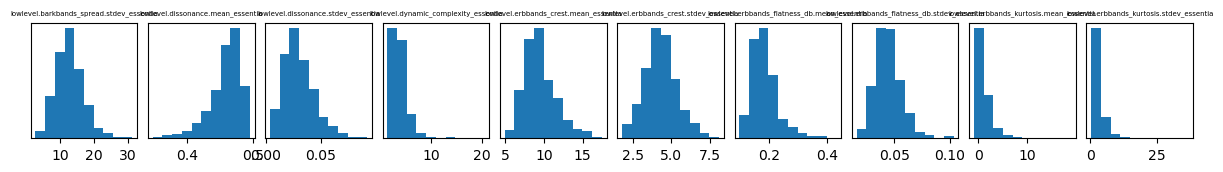

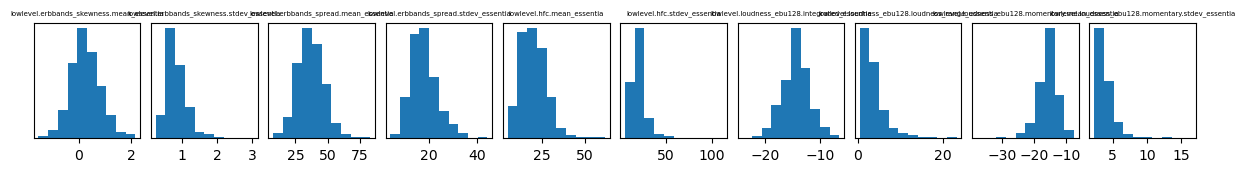

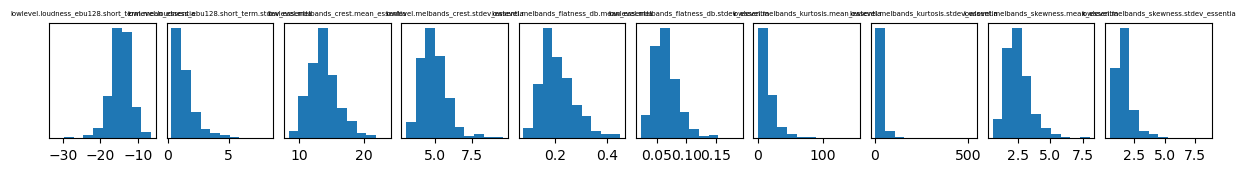

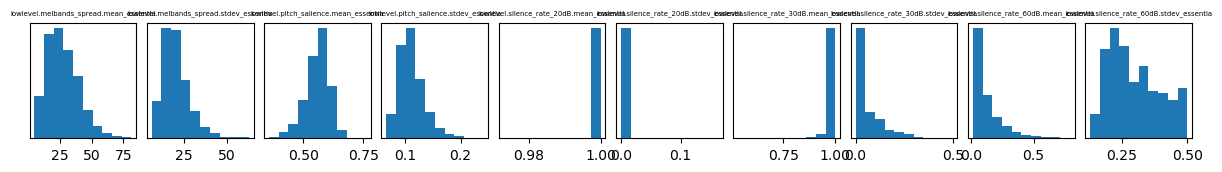

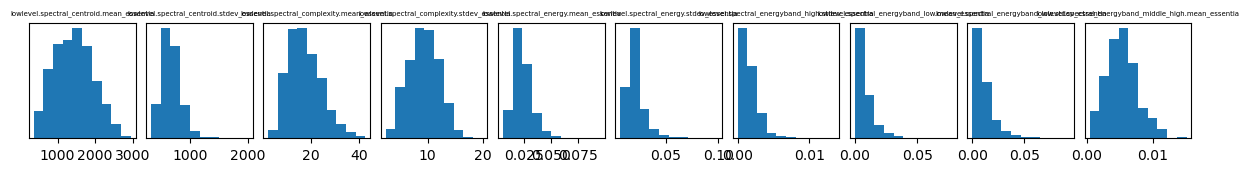

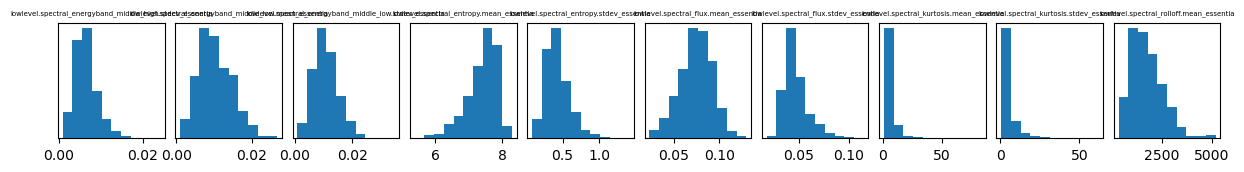

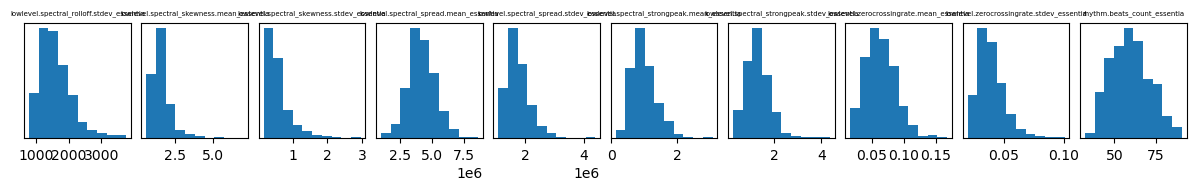

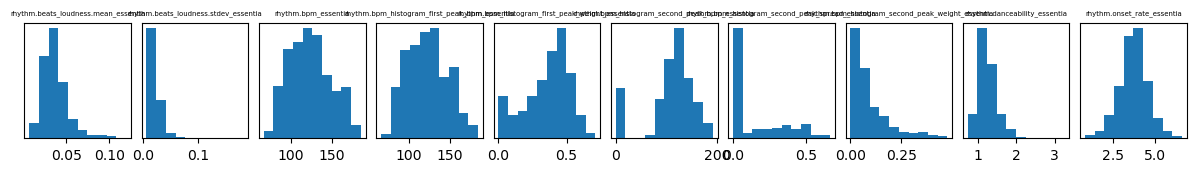

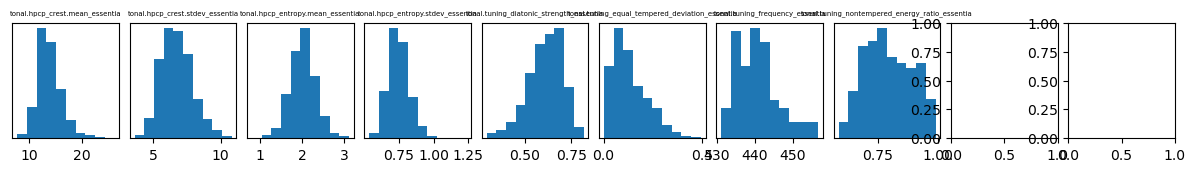

In [22]:
for j in range(0,10):
    fig, axes = plt.subplots(1, 10, figsize=(15, 1.5))
    for i in range(10):
        if i+10*j < features_ef.shape[1]:
            axes[i].hist(features_ef[:,i+10*j])
            axes[i].set_yticks([])
            axes[i].set_title(feature_names_ef[i+10*j], fontsize=5)
    plt.subplots_adjust(wspace=0.1, hspace=0)
    plt.show()

In [23]:
qt = QuantileTransformer(n_quantiles = 500, output_distribution='normal')
features_ef = qt.fit_transform(features_ef)

### Lyrics

In [24]:
with open('data/text_modality/sentences_lines_577.pkl', 'rb') as f:
    data_lyrics_lines_577 = dill.load(f)

In [26]:
lyrics_vocab_description_577 = pd.read_csv('data/text_modality/lyrics_vocab_description_577.csv', index_col=0)

In [27]:
lyrics_present = pd.read_csv('data/text_modality/lyrics_exist.csv', index_col=0)

## Input to the model

In [28]:
def make_input(views_list, feature_names, version_name):
    FACTM_data = {}

    for i in range(len(views_list)):
        FACTM_data['M'+str(i)] = views_list[i]
    
    with open('data/input/FACTM_input_'+version_name+'.pkl', 'wb') as file:
        dill.dump(FACTM_data, file)
    with open('data/input/FACTM_input_'+version_name+'_names.pkl', 'wb') as file:
        dill.dump([feature_names], file)

In [31]:
make_input([features_sf[lyrics_present['exists'],:], features_mf[lyrics_present['exists'],:], features_ef[lyrics_present['exists'],:],
            features_lf,
            data_lyrics_lines_577],
            [feature_names_sf, feature_names_mf, feature_names_ef, feature_names_lf, lyrics_vocab_description_577],
            'sentences-lines_SMEL_577')